# Gender Recognition using Convolutional Neural Networks 
## ~ Ayush Dey

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers as L
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv


# Data Preparation

In [2]:
df=pd.read_csv("../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


# Distribution and Normalization

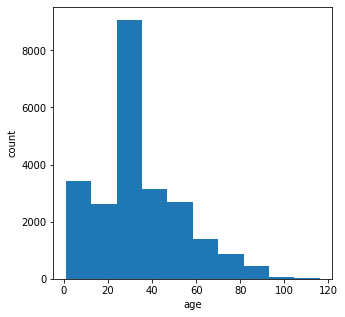

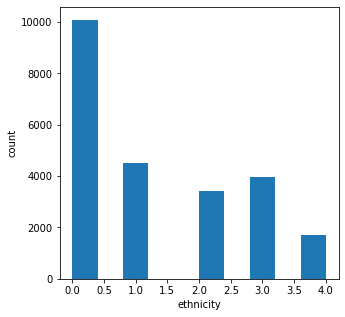

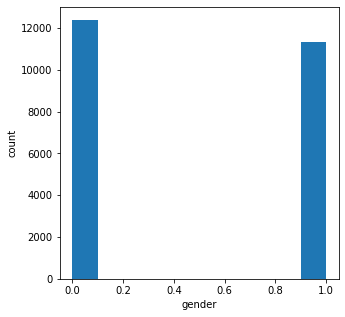

In [5]:
for i in ['age','ethnicity','gender']:
    plt.figure(figsize=(5,5))
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("count")

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [7]:
df['pixels']=df['pixels']/255

# Gender Recognition Model Building

In [8]:
X=np.array(df['pixels'].tolist())
X=X.reshape(X.shape[0],48,48,1)

In [9]:
y=df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
input=X_train.shape[1:]
model = tf.keras.Sequential([
    L.InputLayer(input_shape=input),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

# Feeding Model & Evaluation

In [12]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=8, verbose=0,restore_best_weights=True)
history = model.fit( X_train, y_train, epochs=20, batch_size=64,validation_split=0.1, callbacks=[callback],verbose=1)

Epoch 1/20
267/267 [==============================] - 30s 108ms/step - loss: 0.5756 - accuracy: 0.6930 - val_loss: 0.6008 - val_accuracy: 0.8139
Epoch 2/20
267/267 [==============================] - 29s 107ms/step - loss: 0.4163 - accuracy: 0.8110 - val_loss: 0.3973 - val_accuracy: 0.8403
Epoch 3/20
267/267 [==============================] - 28s 105ms/step - loss: 0.3564 - accuracy: 0.8415 - val_loss: 0.3234 - val_accuracy: 0.8614
Epoch 4/20
267/267 [==============================] - 28s 106ms/step - loss: 0.3377 - accuracy: 0.8510 - val_loss: 0.3147 - val_accuracy: 0.8645
Epoch 5/20
267/267 [==============================] - 28s 106ms/step - loss: 0.3198 - accuracy: 0.8637 - val_loss: 0.2891 - val_accuracy: 0.8735
Epoch 6/20
267/267 [==============================] - 29s 108ms/step - loss: 0.3086 - accuracy: 0.8699 - val_loss: 0.3081 - val_accuracy: 0.8614
Epoch 7/20
267/267 [==============================] - 29s 108ms/step - loss: 0.2903 - accuracy: 0.8766 - val_loss: 0.2798 - val_ac

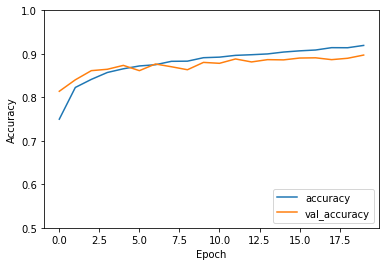

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [14]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

149/149 - 2s - loss: 0.2383 - accuracy: 0.8912


# Sample Testing

In [15]:
predictions=model.predict(X_test)

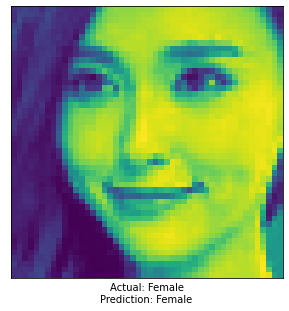

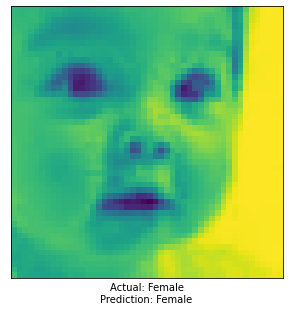

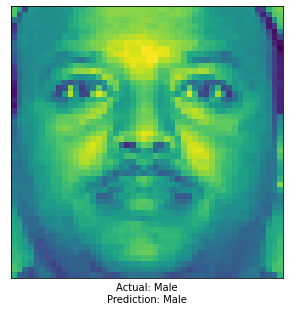

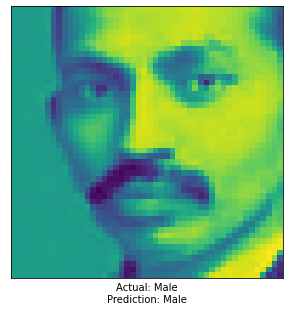

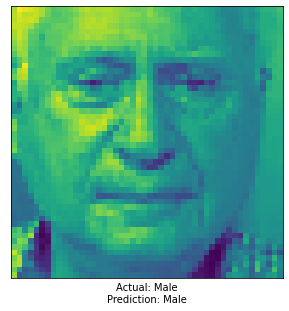

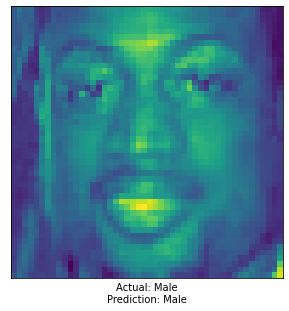

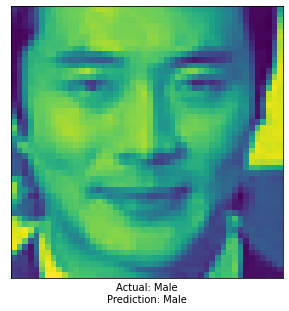

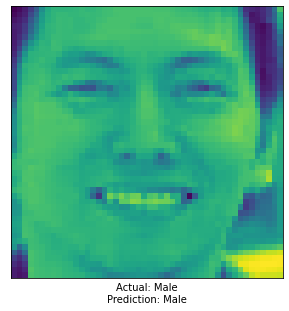

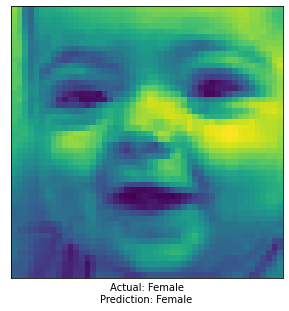

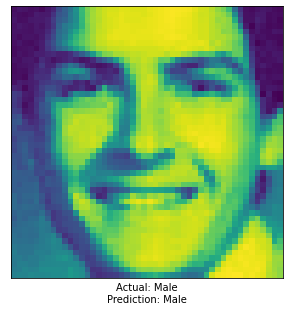

In [16]:
gen={0:'Male',1:'Female'}
for i in range(10):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(48,48))
    if predictions[i].round(0)==0:
        plt.xlabel("Actual: "+str(gen[y_test.iloc[i]])+'\n'+"Prediction: Male")
    else:
        plt.xlabel("Actual: "+str(gen[y_test.iloc[i]])+'\n'+"Prediction: Female")
plt.show()

# Result
 ### Training Accuracy: 91.8% 
 ### Testing Accuracy: 89.4%